# 1. Problem definition

 
 `Given clinical parameter about a adult individual, can we predict whether or not he/she has diabetes?`
 
 The problem will be exploring a binary classification ( have or not diabetes)

# 2. Data

The data from the model is from the data set **"Early stage diabetes risk prediction dataset"**.

<br>The original data was dowloaded from UCI Machine Learning repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.) 

<br> The dataset contains 17 attributes and 521 instances

# 3. Evaluation

The project will be implemented if the model reachs at least 90% acuracy

# 4. Features

The following are the features we will use to predict if a individual has or not diabetes

1. Age - 20-65
2. Sex- 1. Male, 2. Female
3. Polyuria-  1.Yes, 2.No.
4. Polydipsia- 1.Yes, 2.No.
5. sudden weight loss 1.Yes, 2.No.
6. weakness 1.Yes, 2.No.
7. Polyphagia 1.Yes, 2.No.
8. Genital thrush 1.Yes, 2.No.
9. visual blurring 1.Yes, 2.No.
10. Itching 1.Yes, 2.No.
11. Irritability 1.Yes, 2.No.
12. delayed healing 1.Yes, 2.No.
13. partial paresis 1.Yes, 2.No.
14. muscle stiffness 1.Yes, 2.No.
15. Alopecia 1.Yes, 2.No.
16. Obesity 1.Yes, 2.No.
17. Class 1.Positive, 2.Negative.


After the transformation of the dataframe into numeric, the values are:
positive': 1, 'negative':0, 'yes':1, 'no': 0, 'female': 0, 'males':1

you can also find it in the dictionary dic_values

# 5. Tools

In [1]:
# EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import prince
import pickle


# to plots appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# 6. Load Data

In [2]:
df = pd.read_csv("data/diabetes_data.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# 7. Analysis

### Data cleaning and transformations

In [176]:
# transform the columns names into lowercase
df.columns = map(str.lower, df.columns)

In [4]:
#check our datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

In [5]:
#since all our attributes are categorical exepct for age, let's transfor age into categories
df_cat = df.copy()
df_cat['c_age'] = df['age']
for a in range(len(df_cat)):
    for i, c in df_cat.items():
        if i == 'age':
            if c[a] <= 29:
                df_cat['c_age'].replace(c[a],'Young Adult',inplace=True)
            if  30<= c[a] <= 59:
                df_cat['c_age'].replace(c[a],'Adult',inplace=True)
            if c[a] >= 60:
                df_cat['c_age'].replace(c[a],'Senior Adult',inplace=True)
                

df_cat



,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class,c_age
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,Adult
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,Adult
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,Adult
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,Adult
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,Senior Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive,Adult
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive,Adult
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive,Adult
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative,Adult


In [6]:
#since our age is categorized, we don't need the age column any more
df_cat.drop('age',axis=1, inplace =True)

In [101]:
# now we are ready to transform our dataframe content to numeric 
df_num = df_cat.copy()
# Frist convert into category data type
# second turn the categories into numbers by using lable encoding (.code)
for label, content in df_num.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_num[label] = content.astype("category").cat.as_ordered()
        df_num[label] = pd.Categorical(content).codes # convertinb to number
        
df_num


,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class,c_age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
516,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0
517,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0
518,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0


In [11]:
# create a dictionary with the values for the numeric dataframe
dic_values = {'positive': 1, 'negative':0, 'yes':1, 'no': 0, 'female': 0, 'males':1, 'Adult':0,
              'Senior Adult':1,'Young Adult':2}

dic_values


{'positive': 1,
 'negative': 0,
 'yes': 1,
 'no': 0,
 'female': 0,
 'males': 1,
 'Adult': 0,
 'Senior Adult': 1,
 'Young Adult': 2}

### Exploratory data analysis (EDA)

In [12]:
# Count how many cases are positive and how many are negative for diabetes
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

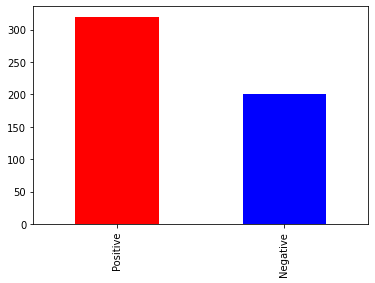

In [5]:
df["class"].value_counts().plot(kind='bar', color =['red','blue']);

In [8]:
#let's check how many positives and negatives cases are male and female

df['gender'].value_counts()

Male      328
Female    192
Name: gender, dtype: int64

In [16]:
pd.crosstab(df['class'], df['gender'])

gender,Female,Male
class,,
Negative,19,181
Positive,173,147


In [102]:
# I decided to drop the gender conlumn from my analyses because the proportion of male and female positive is
# not balanced and it can influence my models
df_num=df_num.drop('gender', axis=1)
df_cat=df_cat.drop('gender', axis=1)

<AxesSubplot:ylabel='Frequency'>

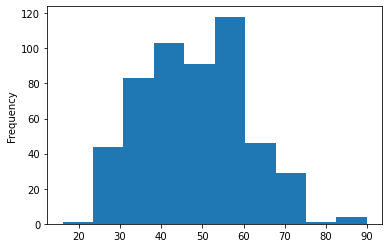

In [103]:
# check the age effect in diabetes 

df['age'].plot.hist()

Text(0, 0.5, 'Amount')

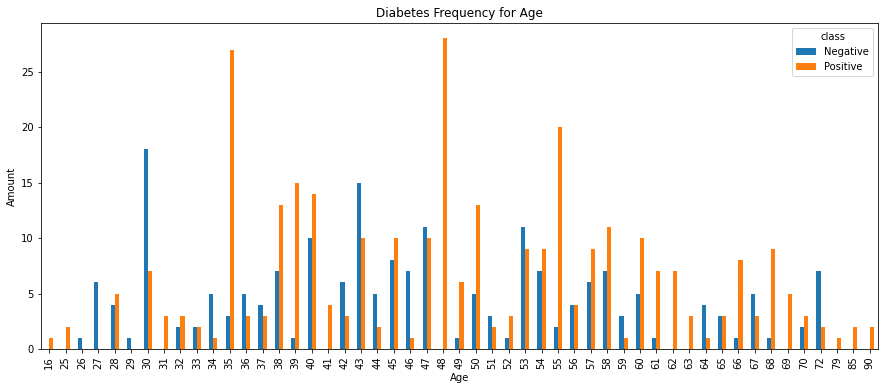

In [104]:
pd.crosstab(df['age'], df['class']).plot(kind='bar', figsize=(15,6))
plt.title("Diabetes Frequency for Age")
plt.xlabel("Age")
plt.ylabel("Amount")

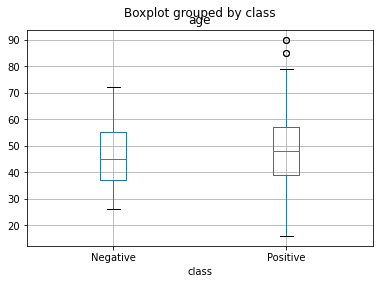

In [105]:
df.boxplot('age','class');

we can see that there is no big difference bettwen ages of positives and negatives cases.

Let's explore our data now using ages into young, adult and senior categories

Text(0, 0.5, 'Amount')

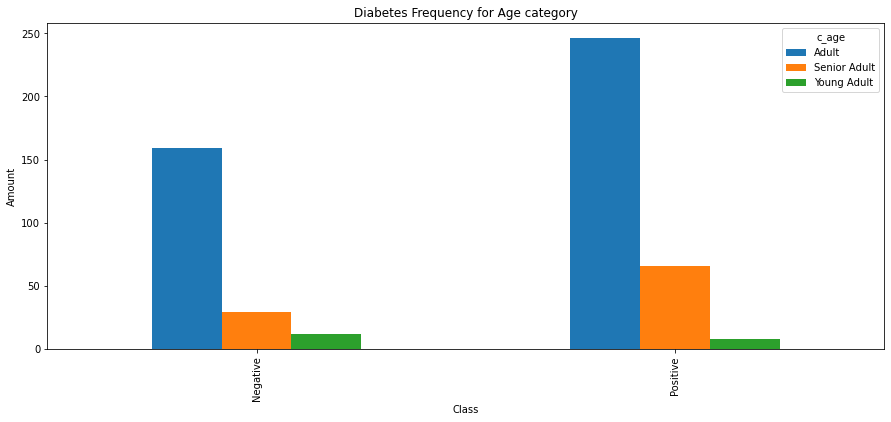

In [106]:
#the df_cat dataframe is been used here. that is because in this df age is in categories
pd.crosstab(df_cat['class'], df_cat['c_age']).plot(kind='bar', figsize=(15,6))
plt.title("Diabetes Frequency for Age category")
plt.xlabel("Class")
plt.ylabel("Amount")

We can see that for adults and seniors most of the cases are positive.#But we also notive that there is way more samples of adults than for the other classes. A way to solve this is take the proportidion instead of the amount

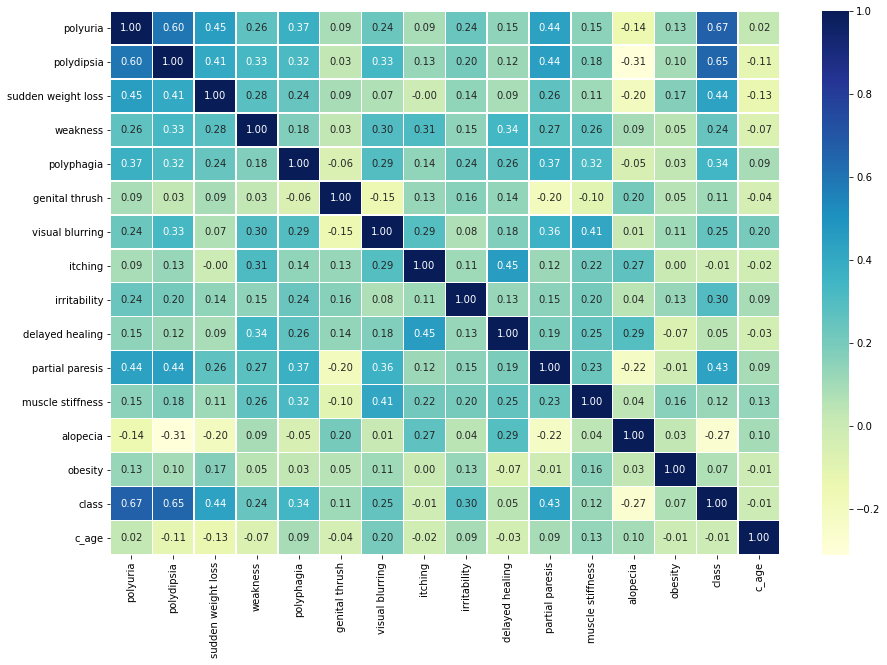

In [107]:
# lets try to do some correlations between the attributes
corr_matrix = df_num.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

### Modeling

To analyze the data I'm going to use two approaches. The first one is a descriptive method using MCA analysis.  For the second approach, I will be using a predictive analysis based on machine learning. 


**MCA**

For this section I'm going to use the data frame with age transformed in the following categories: young, adult and senior. 

In [108]:
mca= prince.MCA(
           n_components=15,
           n_iter=3,
           copy=True)

mca = mca.fit(df_cat.drop('class',axis=1)) ## Exclude target variable "class"

In [109]:
mca_eigenvalues = mca.eigenvalues_
mca_eigenvalues

[0.24597284756238225,
 0.13502007652281847,
 0.09979477084284444,
 0.08282788715672525,
 0.06934516152898351,
 0.05885238671693246,
 0.054960982672259066,
 0.049653018396888,
 0.04686738498918456,
 0.04213933753389341,
 0.03525381555080109,
 0.03317161154823962,
 0.0325969751736085,
 0.03097236134671637,
 0.028217310245441357]

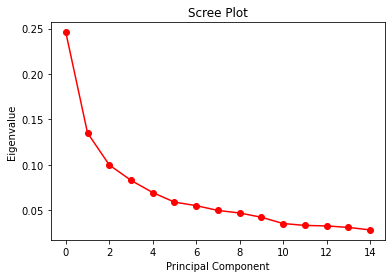

In [110]:
plt.plot(np.arange(15), mca_eigenvalues, 'ro-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

Initially I conducted the MCA analyzes including 15 axis, however,based on the scree plot we can see that the two first axis explaing arround 38% of the data variation. 

In [111]:
mca= prince.MCA(
           n_components=2,
           n_iter=3,
           copy=True)

mca = mca.fit(df_cat.drop('class',axis=1)) ## Exclude target variable "class"

mca_eigenvalues = mca.eigenvalues_
mca_eigenvalues

[0.2459728326802802, 0.13501429651698355]

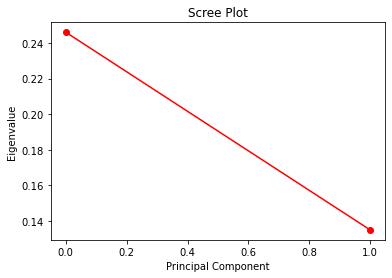

In [114]:
plt.plot(np.arange(2), mca_eigenvalues, 'ro-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

In [115]:
columns = mca.column_coordinates(df_cat.drop('class',axis=1))
columns_names = columns.index


In [116]:
#export columns coordinates to be used in plotly dash
columns.to_csv('mca_columns_coordinates.csv')

In [117]:
rows = mca.row_coordinates(df_cat.drop('class',axis=1))
rows_x = rows[0]
rows_y = rows[1]


In [118]:
#join mca rows coordinates with df_cat.
#it will be exported to use in the plotly dash
df_rows = rows
df_to_export =df_rows.join(df_cat)
# export df
df_to_export.to_csv('mca_rows_coordinates.csv')

In [119]:
#for the graph labels
x =round(mca.explained_inertia_[0]*100,2)
y= round(mca.explained_inertia_[1]*100,2)

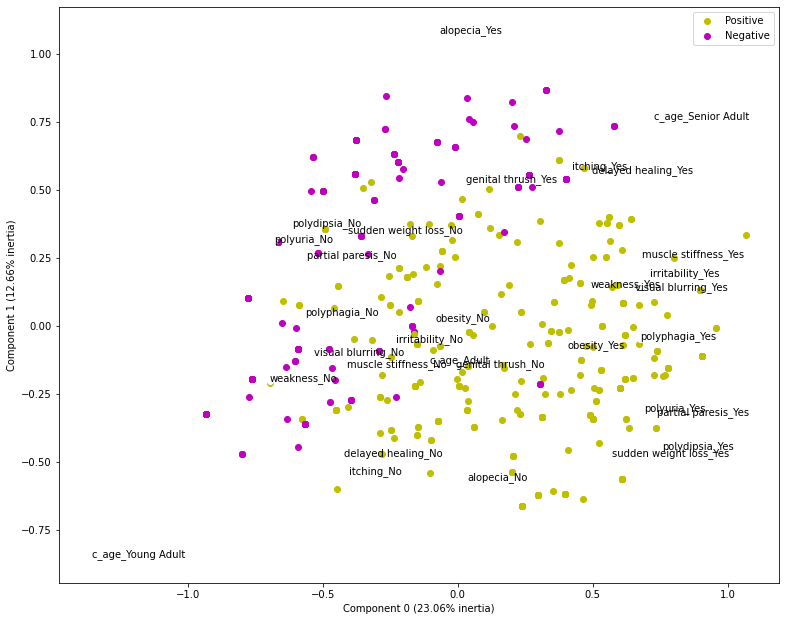

In [120]:
i=0
index=0
fig=plt.figure(figsize=(10,8))
ax=fig.add_axes([0,0,1,1])

#plot the rows
for item in df_cat['class']:
    if item == 'Positive':
        p=ax.scatter(rows_x[i],rows_y[i], color = 'y')
    else:
        n= ax.scatter(rows_x[i],rows_y[i], color = 'm') 
    i+=1
ax.legend([p,n],['Positive','Negative'])

#plot th columns 
ax.scatter(columns[0],columns[1],color='white')
for i in columns_names:
    ax.annotate(i,(columns[0][index],columns[1][index]))
    index +=1 
 
#set labels
ax.set(xlabel='Component 0 ({}% inertia)'.format(x),
       ylabel='Component 1 ({}% inertia)'.format(y));

We can make some assumptions based in the graph above. By ploting the MCA results is possible to observe two distincts groups, one with individuals positive for diabetes and the other one with individuals negative for the desease. It is also evident that most of our attributes with answer yes are related to individous with diabetes, exepted for genital thrush and alopecia. 

We can also observe that some attributes are clustering together like itching and dealey_healing and these five attributes: polyuria, partial paresis, polydipsia, sudden weight loss and gender. 

### Non-descriptive method

For this section I'm going to use the data frame in a numeric format. df_num

In [9]:
dic_values

{'positive': 1,
 'negative': 0,
 'yes': 1,
 'no': 0,
 'female': 0,
 'males': 1,
 'Adult': 0,
 'Senior Adult': 1,
 'Young Adult': 2}

In [148]:
#x=df_num.drop('class', axis=1)
x=df_num.drop('class', axis=1)
y = df_num['class']

**Training and test split**

In [10]:
# #test

# df_num2 = df.copy()
# # Frist convert into category data type
# # second turn the categories into numbers by using lable encoding (.code)
# for label, content in df_num2.items():
#     if not pd.api.types.is_numeric_dtype(content):
#         df_num2[label] = content.astype("category").cat.as_ordered()
#         df_num2[label] = pd.Categorical(content).codes # convertinb to number
        
# np.random.seed(42)

# x=df_num2.drop('class', axis=1)
# y = df_num2['class']
# x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2) 

In [149]:
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2) 

**Model choices**

For this solution I will be using the following models and comparing their results
- Logistic Regression

- RandomForest 

In [150]:
models = {"Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

In [151]:
# this function will be used to fit and score the models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    #creating a list to keept the models scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [152]:
selected_model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
selected_model_scores

{'Logistic Regression': 0.8557692307692307,
 'Random Forest': 0.9519230769230769}

For my baseline random forest had the best performance. Next I will conduct some tunning 

**Tuning and cross-validation**

In [153]:
#LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

#RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

LogisticRegression tuning

In [154]:
# now let's set up and fit LogisticRegression hyperparameters
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [155]:
#check the best paramters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [156]:
rs_log_reg.score(x_test, y_test)

0.8557692307692307

We can see some improvement before tuning the score was 0.9230769230769231

RandomForestClassifier tuning

In [157]:
# set up and fit RandomForestClassifier  hyperparameters
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


In [158]:
# get the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [159]:
rs_rf.score(x_test, y_test)

0.9230769230769231

Seems like random forest is a better choice for our data compared to logistice regression

### Model evaluation

Since it is a classification model, I will use the following metrics to evaluate my model

- ROC curve and AUC score 
- Confusion matrix 
- Classification report 
- Precision 
- Recall 
- F1-score 


In [160]:
# first I will make some predictions on the test data
y_preds = rs_rf.predict(x_test)
y_preds

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int8)

**ROC Curve and AUC Scores**

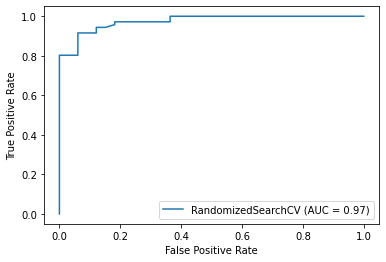

In [161]:
plot_roc_curve(rs_rf, x_test, y_test);

Great results. Your model is predicting very well our data. 
The ROC curve is almost a straight line and the AUC is almost 1.0 

**Confusion matrix**

By usind confusion matrix we will be able to see where the model made right and wrong predictions

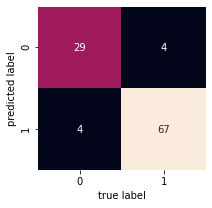

In [162]:

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True, # Annotate the boxes
                cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");

Based on the confusion matrix we can see that our model really did great. It missed 4 positive (false negative) case and classified wrongly only 4 patients with diabetes (false positive)

**Classification report**

In [163]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.94      0.94      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.91      0.91       104
weighted avg       0.92      0.92      0.92       104



**Using cross validation**

In this section i will take my best model (Random forest) and apply the best hyperparameters along with cross_val_socre(). Because so far I've been using just a single traning and test set

In [164]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [165]:
#applying the best parameters to random forest
clf = RandomForestClassifier(n_estimators= 510,
                         min_samples_split= 14,
                         min_samples_leaf= 1,
                         max_depth= None)

In [166]:
clf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=14, n_estimators=510)

In [167]:
clf.score(x_train, y_train)

0.9639423076923077

In [170]:
t=[{'polyuria': 1, 'polydipsia': 0, 'sudden weight loss': 0, 'weakness': 0, 'polyphagia': 0, 'genital thrush': 0, 'visual blurring': 0, 'itching': 0, 'irritability': 0, 'delayed healing': 0, 'partial paresis': 0,
   'muscle stiffness': 0, 'alopecia': 0, 'obese': 0, 'c_age': 0}]

ts=pd.DataFrame.from_dict(t)
ts

,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obese,c_age
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
clf.predict(ts)

array([1], dtype=int8)

In [172]:
#cross validating accuracy score
cv_accuracy = np.mean(cross_val_score(clf,x,y,cv=5,scoring="accuracy"))
cv_accuracy

0.9403846153846154

In [173]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,x,y,cv=5,scoring="precision")) 
cv_precision

0.9504806998556999

In [174]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,x,y,cv=5,scoring="recall")) 
cv_recall

0.95

In [175]:
# Cross-validated f1 score
cv_f1 = np.mean(cross_val_score(clf,x,y,cv=5,scoring="f1")) 
cv_f1

0.9469042669510502

In [146]:
#export the model
pickle.dump(clf, open('classification_model.pkl', 'wb'))

In [147]:
pickle.dump(cv_accuracy, open('model_accuracy.pkl', 'wb'))